In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#url = 'C:\\Users\\UttamSinha\\spam.csv'
#messages = pd.read_csv(url,encoding='latin-1')
url = 'C:\\Users\\UttamSinha\\spam.csv'
#messages = pd.read_csv(url,encoding='latin-1',sep = '\t', names = ['label', 'message'])
#messages = pd.read_csv(url,encoding='latin-1',sep = '\t', names = ['label', 'message'])
#messages = pd.read_csv('https://raw.githubusercontent.com/juinc/python_data_science_and_machine_learning_bootcamp/master/Machine%20Learning%20Sections/Natural-Language-Processing/smsspamcollection/SMSSpamCollection',sep = '\t', names = ['label', 'message'])
#url = 'C:\\Users\\UttamSinha\\spam.csv'
messages = pd.read_csv(url,encoding='latin-1')
messages = messages.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
messages= messages.rename(columns={"v1":"label", "v2":"message"})
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#messages.groupby('label').describe()
messages.groupby('message').describe()
#messages.groupby('v1').describe()

label                  
                                                   count unique   top freq
message                                                                   
 &lt;#&gt;  in mca. But not conform.                   1      1   ham    1
 &lt;#&gt;  mins but i had to stop somewhere fi...     1      1   ham    1
 &lt;DECIMAL&gt; m but its not a common car her...     1      1   ham    1
 and  picking them up from various points              1      1   ham    1
 came to look at the flat, seems ok, in his 50s...     1      1   ham    1
 gonna let me know cos comes bak from holiday t...     1      1   ham    1
 said kiss, kiss, i can't do the sound effects!...     1      1   ham    1
 says that he's quitting at least5times a day s...     1      1   ham    1
 what number do u live at? Is it 11?                   1      1   ham    1
&lt;#&gt;  am I think? Should say on syllabus          1      1   ham    1
&lt;#&gt;  great loxahatchee xmas tree burning ...     1      1   ham    1
&lt;#&gt;  is fast approaching. So, Wish u a ve...     1      1   ham    1
&lt;#&gt;  w jetton ave if you forgot                  1      1   ham    1
&lt;#&gt; %of pple marry with their lovers... b...     1      1   ham    1
&lt;#&gt; , that's all? Guess that's easy enough       1      1   ham    1
&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.          1      1   ham    1
'An Amazing Quote'' - \Sometimes in life its di...     1      1   ham    1
'Wnevr i wana fal in luv vth my books, My bed f...     1      1   ham    1
(And my man carlos is definitely coming by mu t...     1      1   ham    1
(Bank of Granite issues Strong-Buy) EXPLOSIVE P...     1      1  spam    1
(I should add that I don't really care and if y...     1      1   ham    1
(No promises on when though, haven't even gotte...     1      1   ham    1
(That said can you text him one more time?)            1      1   ham    1
(You didn't hear it from me)                           1      1   ham    1
* Am on a train back from northampton so i'm af...     1      1   ham    1
* Am on my way                                         1      1   ham    1
* FREE* POLYPHONIC RINGTONE Text SUPER to 87131...     1      1  spam    1
* Thought I didn't see you.                            1      1   ham    1
* Was a nice day and, impressively, i was sensi...     1      1   ham    1
* Was really good to see you the other day dude...     1      1   ham    1
...                                                  ...    ...   ...  ...
yes baby! I need to stretch open your pussy!           1      1   ham    1
you are sweet as well, princess. Please tell me...     1      1   ham    1
Û_ and donÛ÷t worry weÛ÷ll have finished by ...     1      1   ham    1
Û_ we r stayin here an extra week, back next w...     1      1   ham    1
ÌÏ all write or wat..                                  1      1   ham    1
ÌÏ bot notes oredi... Cos i juz rem i got...           1      1   ham    1
ÌÏ called dad oredi...                                 1      1   ham    1
ÌÏ collecting ur laptop then going to configure...     1      1   ham    1
ÌÏ come lt 25 n pass to me lar                         1      1   ham    1
ÌÏ comin to fetch us oredi...                          1      1   ham    1
ÌÏ dun need to pick ur gf?                             1      1   ham    1
ÌÏ dun wan to watch infernal affair?                   1      1   ham    1
ÌÏ eatin later but i'm eatin wif my frens now l...     1      1   ham    1
ÌÏ give me some time to walk there.                    1      1   ham    1
ÌÏ go home liao? Ask dad to pick me up at 6...         1      1   ham    1
ÌÏ got wat to buy tell us then Ì_ no need to co...     1      1   ham    1
ÌÏ log off 4 wat. It's sdryb8i                         1      1   ham    1
ÌÏ mean it's confirmed... I tot they juz say on...     1      1   ham    1
ÌÏ neva tell me how i noe... I'm not at home in...     1      1   ham    1
ÌÏ no home work to do meh...                           1      1   ham    1
Ì

In [4]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
#messages['length'] = messages['message'].apply(len)

messages['length'] = messages['label'].apply(len)
#messages['length'] = (int)messages['message'].apply(len)
#messages['v1'] = messages['v1'].apply(len)

In [6]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",3
1,ham,Ok lar... Joking wif u oni...,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4
3,ham,U dun say so early hor... U c already then say...,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",3


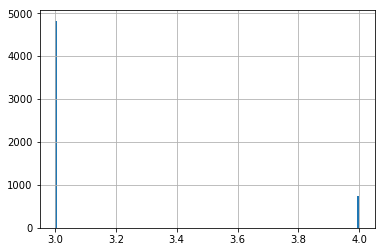

In [7]:
#messages['length'].hist(bins = 150)
messages['length'].hist(bins = 150)
#messages['v1'].hist(bins = 150)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000083CA197550>]], dtype=object)

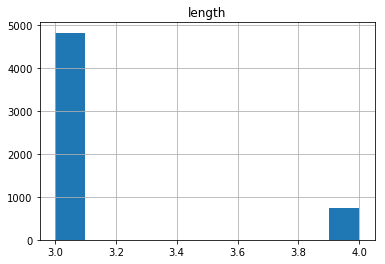

In [8]:
import matplotlib.pyplot as plt
plt.show()
messages.hist()

In [9]:
from pandas.plotting import scatter_matrix
print(messages.describe())

            length
count  5572.000000
mean      3.134063
std       0.340751
min       3.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000


In [10]:
print(messages.groupby('label').size())
print(messages.groupby('message').size())

label
ham     4825
spam     747
dtype: int64
message
 &lt;#&gt;  in mca. But not conform.                                                                                                                                                                                                                                                                                                                                                                                                                                             1
 &lt;#&gt;  mins but i had to stop somewhere first.                                                                                                                                                                                                                                                                                                                                                                                                                              1
 &lt;DECIMAL&

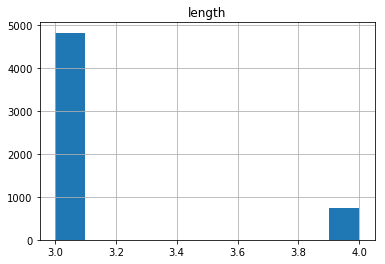

<bound method DataFrame.info of      label                                            message  length
0      ham  Go until jurong point, crazy.. Available only ...       3
1      ham                      Ok lar... Joking wif u oni...       3
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...       4
3      ham  U dun say so early hor... U c already then say...       3
4      ham  Nah I don't think he goes to usf, he lives aro...       3
5     spam  FreeMsg Hey there darling it's been 3 week's n...       4
6      ham  Even my brother is not like to speak with me. ...       3
7      ham  As per your request 'Melle Melle (Oru Minnamin...       3
8     spam  WINNER!! As a valued network customer you have...       4
9     spam  Had your mobile 11 months or more? U R entitle...       4
10     ham  I'm gonna be home soon and i don't want to tal...       3
11    spam  SIX chances to win CASH! From 100 to 20,000 po...       4
12    spam  URGENT! You have won a 1 week FREE membership 

In [11]:
messages.hist()
plt.show()
messages.info

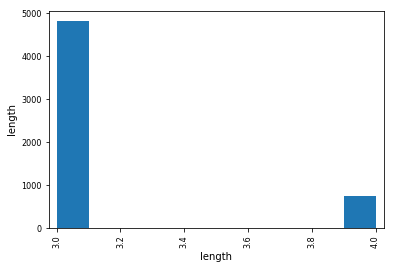

In [12]:
scatter_matrix(messages)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000083C9CB35F8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000083C9C8B588>], dtype=object)

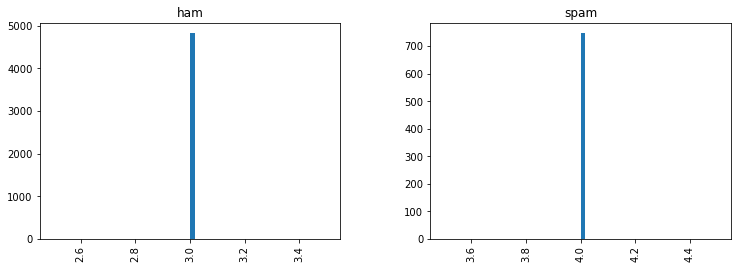

In [13]:
messages.hist(column='length', by = 'label', bins  = 60, figsize=(12,4))
#Here we see that the Ham message is centered around 1-100
#But spam message is certered around 150

In [14]:
import string

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
from nltk.corpus import stopwords

In [17]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
def text_processing(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
messages['message'].head().apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow_transformer = CountVectorizer(analyzer=text_processing).fit(messages['message'])

In [22]:
print(len(bow_transformer.vocabulary_))

11304


In [23]:
mess4 = messages['message'][3]

In [24]:
bow4 = bow_transformer.transform([mess4])

In [25]:
bow4.shape

(1, 11304)

In [26]:
print(bow4)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [27]:
#bow_transformer.get_feature_names()[9554]
bow_transformer.get_feature_names()[8806]

'pocy'

In [28]:
messages_bow =bow_transformer.transform(messages['message'])

In [29]:
messages_bow.shape

(5572, 11304)

In [30]:
messages_bow.nnz

50193

In [31]:
sparsity = 100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1])

In [32]:
sparsity

0.07968927896991783

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [35]:
tfidf4 = tfidf_transformer.transform(bow4)

In [36]:
print(tfidf4)

  (0, 9445)	0.539151517936
  (0, 7091)	0.438375519235
  (0, 6136)	0.318314301131
  (0, 6118)	0.299155129554
  (0, 5179)	0.296919567515
  (0, 4551)	0.265857766339
  (0, 3996)	0.409247086127


In [37]:
#checking Inverse document freq. for a one word
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [38]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [39]:
messages_tfidf.shape

(5572, 11304)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [42]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [43]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [44]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'],
      dtype='<U4')

In [45]:
from sklearn.cross_validation import train_test_split

C:\Users\UttamSinha\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],
                                                            messages['label'], 
                                                            test_size = 0.3)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [48]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_processing)),('tfidf', TfidfTransformer()),('classifier', MultinomialNB())])

In [49]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x00000083C9EAFAE8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [50]:
predictions = pipeline.predict(msg_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1445
       spam       1.00      0.73      0.84       227

avg / total       0.96      0.96      0.96      1672



In [53]:
print(confusion_matrix(label_test, predictions))

[[1445    0]
 [  62  165]]


In [54]:
#Lets fit a Random forest classifier
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [55]:
pipeline2.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x00000083C9EAFAE8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [56]:
predictions2 = pipeline2.predict(msg_test)
print(classification_report(label_test, predictions2))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1445
       spam       1.00      0.76      0.87       227

avg / total       0.97      0.97      0.97      1672



In [57]:
import numpy as np
import pandas as pd # pandas is also used in the iloc function which is some kind of integer position based kind of thing
import matplotlib.pyplot as plt
import string
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from subprocess import check_output

In [58]:
def pre_process(text):    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [59]:
textFeatures = messages['message'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)
features_train, features_test, labels_train, labels_test = train_test_split(features, messages['label'], test_size=0.3, random_state=111)

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy_score(labels_test,prediction)

0.97846889952153115

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=2.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy_score(labels_test,prediction)

0.97248803827751196

In [62]:
from sklearn.naive_bayes import MultinomialNB

#mnb = MultinomialNB(alpha=0.2)

mnb = MultinomialNB(alpha=0.)
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
accuracy_score(labels_test,prediction)

C:\Users\UttamSinha\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.97308612440191389

In [63]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [64]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",3
1,ham,Ok lar... Joking wif u oni...,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4
3,ham,U dun say so early hor... U c already then say...,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",3


In [65]:
y=messages.iloc[:,0].values

In [66]:
orpus=[]
for i in range(0,5572):
    review = re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    orpus.append(review)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer    
cv=CountVectorizer(max_features=3000)
x=cv.fit_transform(orpus).toarray()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
y=le.fit_transform(y) 

In [68]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [69]:
pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred)))
print('Recall score: {}'.format(recall_score(y_test, pred)))
print('F1 score: {}'.format(f1_score(y_test, pred)))

Accuracy score: 0.8762331838565023
Precision score: 0.504
Recall score: 0.9
F1 score: 0.6461538461538462


In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=15,criterion='entropy')
classifier1.fit(X_train,y_train)
predRF=classifier1.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predRF)))
print('Precision score: {}'.format(precision_score(y_test, predRF)))
print('Recall score: {}'.format(recall_score(y_test, predRF)))
print('F1 score: {}'.format(f1_score(y_test, predRF)))
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

Accuracy score: 0.9766816143497757
Precision score: 1.0
Recall score: 0.8142857142857143
F1 score: 0.8976377952755905
